<a href="https://colab.research.google.com/github/XMAWDAH/Books_Recommendation_system/blob/main/CS492_BookRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First: importing all libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [ ]:
#uploading csv files
from google.colab import files
files.upload()

Saving BX-Book-Ratings.csv to BX-Book-Ratings.csv
Saving BX-Books.csv to BX-Books.csv
Saving BX-Users.csv to BX-Users.csv


In [ ]:
#read everything, later on execlude things..
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

<ipython-input-16-59c6a3b221b4>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected

In [ ]:
#test 1: creating a new data set containing: ISBN, UserID, BookTitle, bookRating
newDataSet = pd.merge(ratings, books, on='ISBN')
UselessColumns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
newDataSet = newDataSet.drop(UselessColumns, axis=1)    #drop useless columns

newDataSet.dropna(axis = 0, subset = ['bookTitle'])
newBookRating = (newDataSet.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]        #count total counts of ratings for each book
    )
print("\n", newDataSet.head())      #test output, gives top 5 of the table


    userID        ISBN  bookRating             bookTitle
0  276725  034545104X           0  Flesh Tones: A Novel
1    2313  034545104X           5  Flesh Tones: A Novel
2    6543  034545104X           0  Flesh Tones: A Novel
3    8680  034545104X           5  Flesh Tones: A Novel
4   10314  034545104X           9  Flesh Tones: A Novel



    userID        ISBN  bookRating             bookTitle  totalRatingCount
0  276725  034545104X           0  Flesh Tones: A Novel                60
1    2313  034545104X           5  Flesh Tones: A Novel                60
2    6543  034545104X           0  Flesh Tones: A Novel                60
3    8680  034545104X           5  Flesh Tones: A Novel                60
4   10314  034545104X           9  Flesh Tones: A Novel                60

    userID        ISBN  bookRating             bookTitle  totalRatingCount
0  276725  034545104X           0  Flesh Tones: A Novel                60
1    2313  034545104X           5  Flesh Tones: A Novel                60
2    6543  034545104X           0  Flesh Tones: A Novel                60
3    8680  034545104X           5  Flesh Tones: A Novel                60
4   10314  034545104X           9  Flesh Tones: A Novel                60




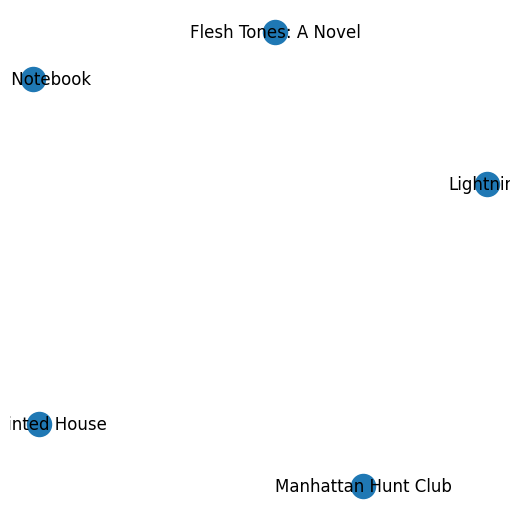

5

In [ ]:
BooksRatingwithCount = newDataSet.merge(newBookRating, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
print("\n", BooksRatingwithCount.head())

#test output of popularity, the threshold was set to 50, so we'll leave it as it is
popularity_threshold = 50
popularBook = BooksRatingwithCount.query('totalRatingCount >= @popularity_threshold')
print("\n", popularBook.head())

#testing ability to get a graph out the previous output:
booksPopG = nx.Graph()
for booksPop in popularBook['bookTitle']:
       if booksPopG.number_of_nodes() < 5:      #top 5
           booksPopG.add_node(booksPop)

#booksPopG.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5)]) #later test links...
print("\n")
plt.figure(figsize=(5, 5))
nx.draw(booksPopG, with_labels=True)
plt.show()
booksPopG.number_of_nodes()

In [ ]:
#plotting a graph to test successful upload
bookgraph=nx.Graph()
for t in books['bookTitle']:
       if bookgraph.number_of_nodes()<2000:#out of11123
           bookgraph.add_node(t)
plt.figure(figsize=(20,20))
nx.draw_random(bookgraph, with_labels=True)
bookgraph.number_of_nodes()

In [ ]:
#The book with ISBN “0971880107” received the most rating counts.
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head()

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [ ]:
#Find out what book it is, and what books are in the top 5.
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0060928336', '0440214041', '0385504209'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
3,0440214041,The Pelican Brief,John Grisham,1993,Dell,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...
4,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...


In [ ]:
#storing counts, then filtering, this will ensure statistical significance
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)] #users with less than 200 ratings execluded
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)] #books with less than 100 ratings

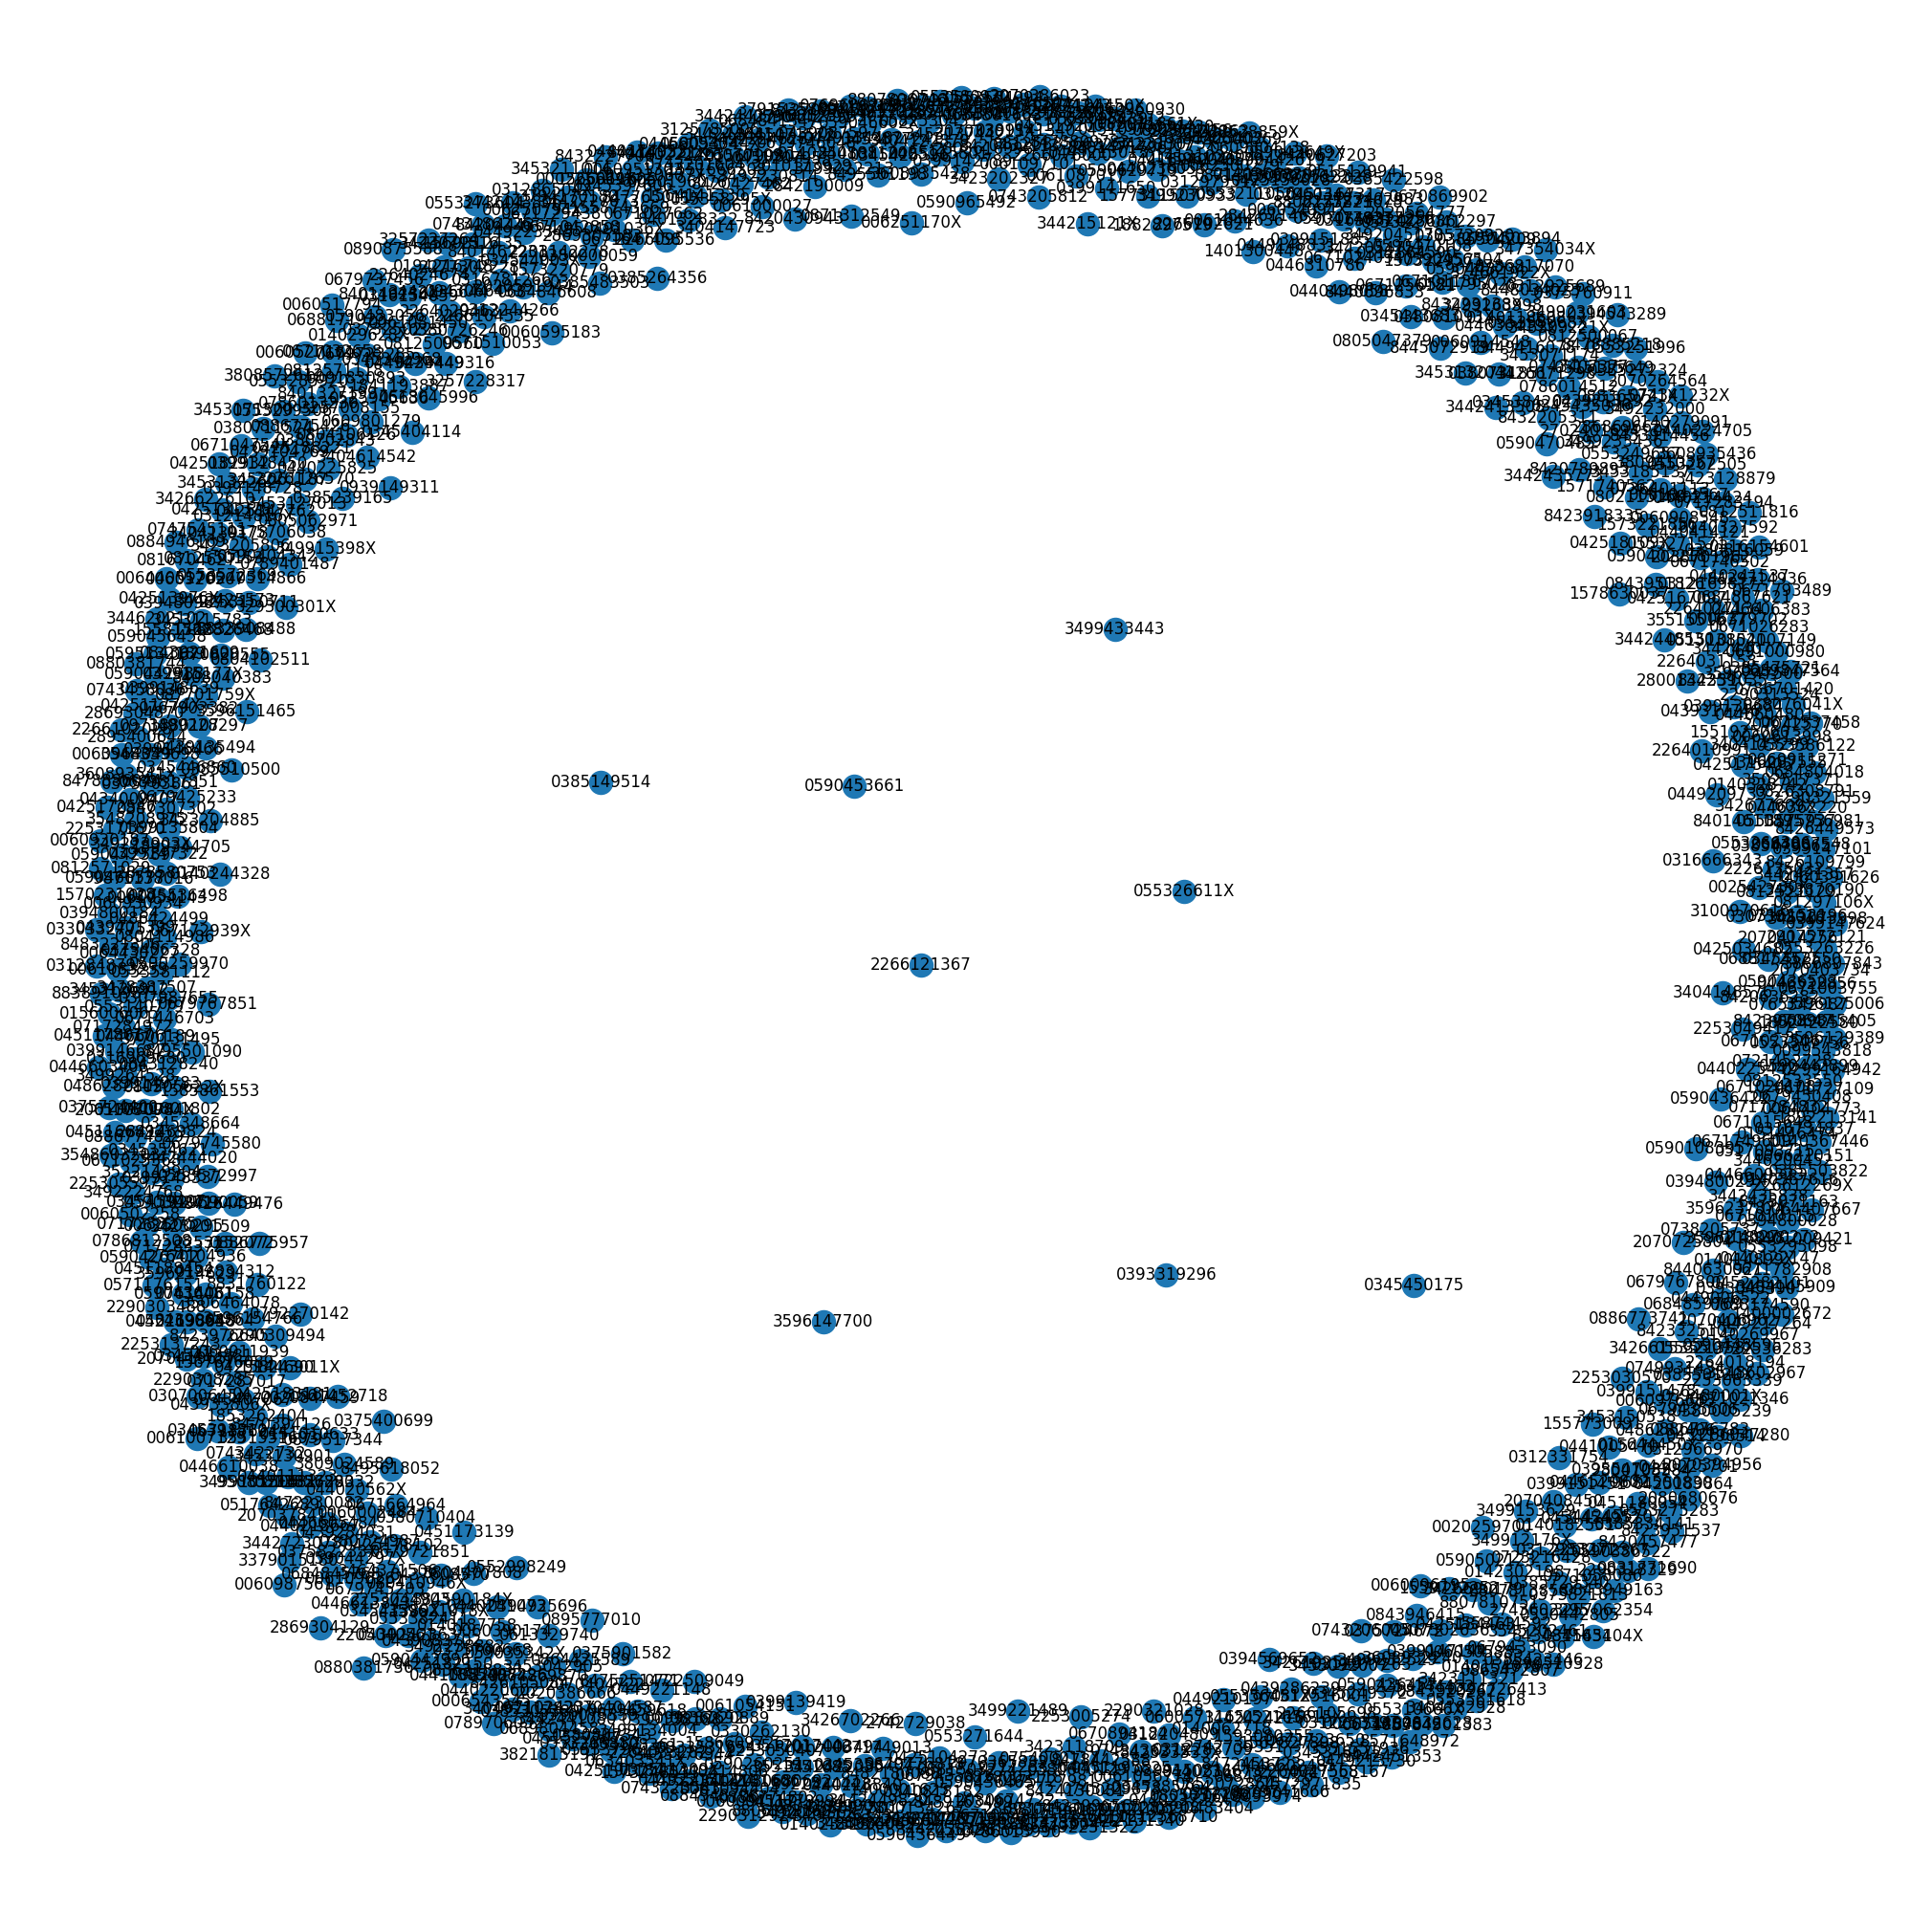

In [ ]:
#test 2:
#until now, there are no links!
newGraph = nx.Graph()
for aBook in newDataSet['ISBN']:
  if newGraph.number_of_nodes() < 1000:      #example only showing a subset of the dataset
           newGraph.add_node(aBook)

plt.figure(figsize=(20, 20))
nx.draw(newGraph, with_labels=True)
plt.show()

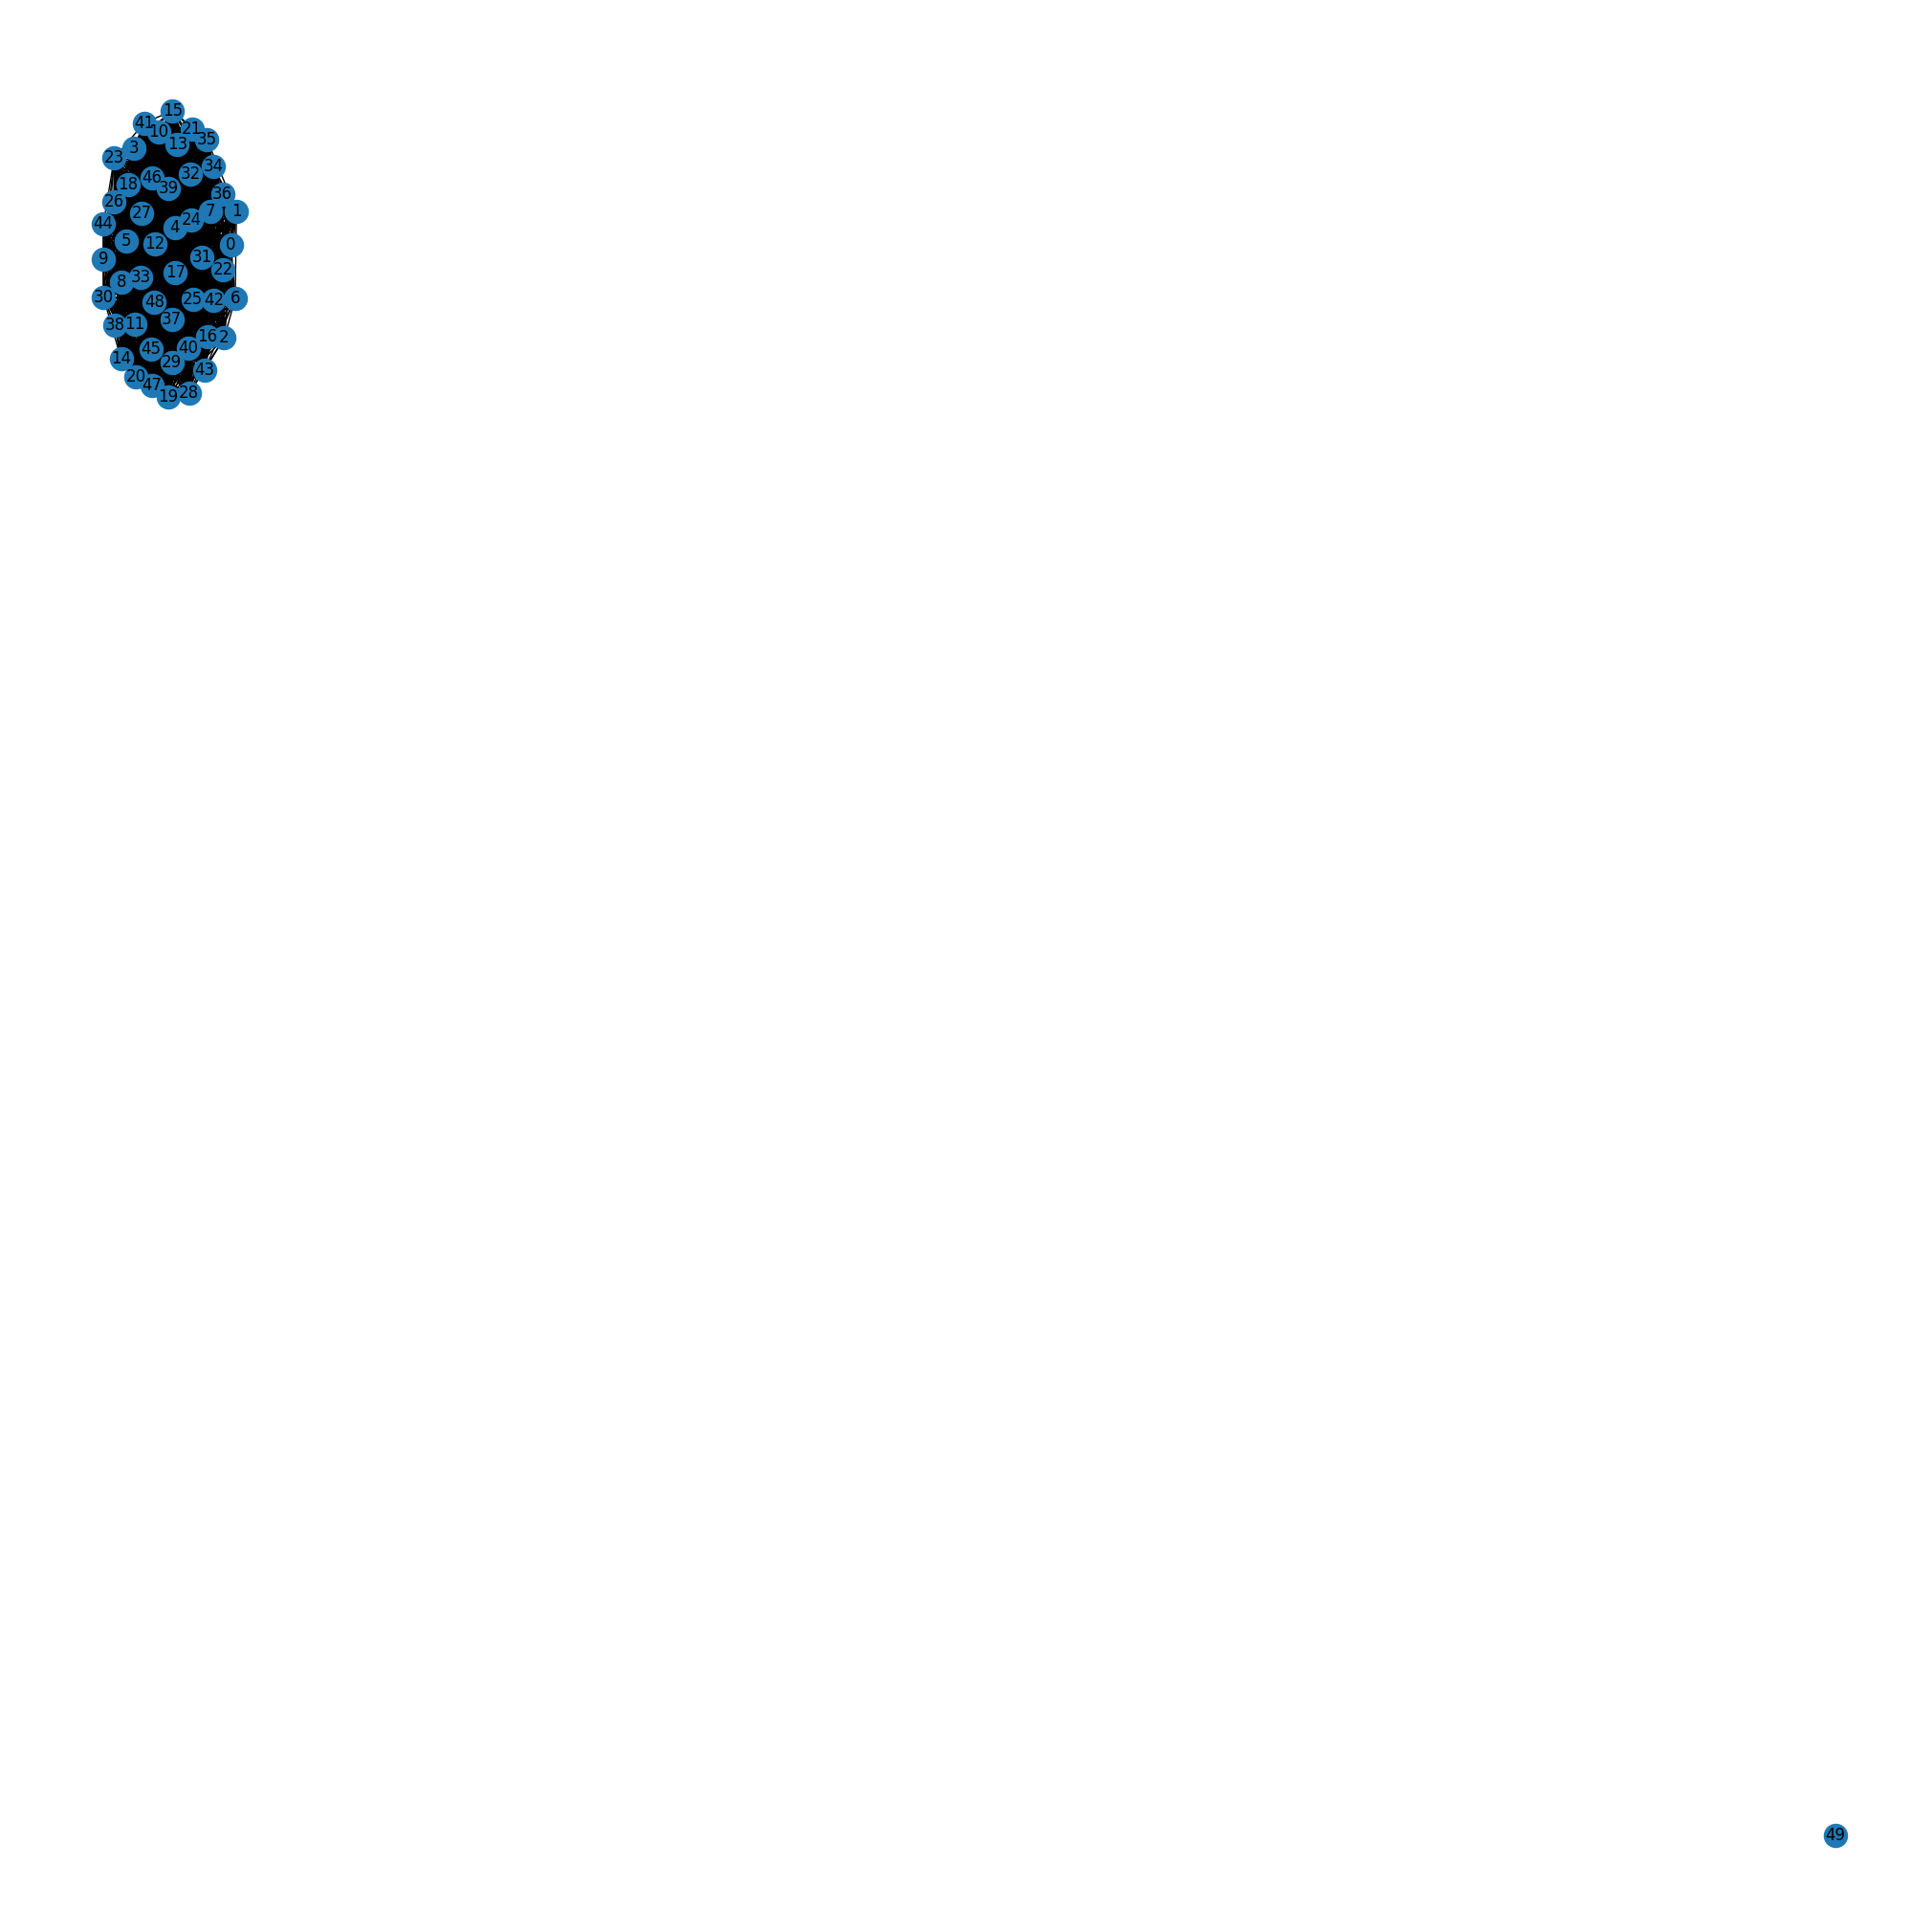

[(0, {'userID': 276725, 'ISBN': '034545104X'}), (1, {'userID': 2313, 'ISBN': '034545104X'}), (2, {'userID': 6543, 'ISBN': '034545104X'}), (3, {'userID': 8680, 'ISBN': '034545104X'}), (4, {'userID': 10314, 'ISBN': '034545104X'}), (5, {'userID': 23768, 'ISBN': '034545104X'}), (6, {'userID': 28266, 'ISBN': '034545104X'}), (7, {'userID': 28523, 'ISBN': '034545104X'}), (8, {'userID': 39002, 'ISBN': '034545104X'}), (9, {'userID': 50403, 'ISBN': '034545104X'}), (10, {'userID': 56157, 'ISBN': '034545104X'}), (11, {'userID': 59102, 'ISBN': '034545104X'}), (12, {'userID': 59287, 'ISBN': '034545104X'}), (13, {'userID': 63970, 'ISBN': '034545104X'}), (14, {'userID': 77480, 'ISBN': '034545104X'}), (15, {'userID': 77940, 'ISBN': '034545104X'}), (16, {'userID': 81977, 'ISBN': '034545104X'}), (17, {'userID': 94362, 'ISBN': '034545104X'}), (18, {'userID': 98391, 'ISBN': '034545104X'}), (19, {'userID': 112199, 'ISBN': '034545104X'}), (20, {'userID': 115435, 'ISBN': '034545104X'}), (21, {'userID': 123981

In [ ]:
#test 3: adding links, what is the most logical way to link ?
#link between two users if they read the same book!
#in order for our code to work faster, we eliminated the number of points to 50

linkingGraph = nx.Graph()
i = 0
for aUser in newDataSet['userID']:
  if(linkingGraph.number_of_nodes() < 50):
    linkingGraph.add_node(i, userID=aUser, ISBN=newDataSet['ISBN'][i])
    i = i + 1

NumNodes = linkingGraph.number_of_nodes()

for k in range(NumNodes-2):
  for j in range(NumNodes-1):
    if j == 49: break;
    if linkingGraph.nodes[k]['ISBN'] == linkingGraph.nodes[j]['ISBN'] and j != k:
      linkingGraph.add_edge(k, j)

plt.figure(figsize=(20,20))
nx.draw(linkingGraph, with_labels=True)
plt.show()

print(linkingGraph.nodes.data())

In [ ]:
#filtering part: filter to only Canada and US users
combined = popularBook.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
print(us_canada_user_rating.head())

   userID        ISBN  bookRating             bookTitle  totalRatingCount  \
0  276725  034545104X           0  Flesh Tones: A Novel                60   
1    2313  034545104X           5  Flesh Tones: A Novel                60   
2    6543  034545104X           0  Flesh Tones: A Novel                60   
3    8680  034545104X           5  Flesh Tones: A Novel                60   
4   10314  034545104X           9  Flesh Tones: A Novel                60   

                            Location  
0                  tyler, texas, usa  
1              cincinnati, ohio, usa  
2           strafford, missouri, usa  
3  st. charles county, missouri, usa  
4             beaverton, oregon, usa  


In [ ]:
#implementing kNN on the previous part



#code is working, error because we need to upload files only

from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)
print(model_knn)

query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])    #chooses randomly and starts building matrix of ratings
print(query_index)
print(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1))
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
us_canada_user_rating_pivot.index[query_index]

NearestNeighbors(algorithm='brute', metric='cosine')
1063
[[0. 0. 0. ... 0. 0. 0.]]


'Lying Awake'

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of : {2}'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Lying Awake:

1: Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players, with distance of : 0.8857825647645006
2: Welcome to My Planet: Where English Is Sometimes Spoken, with distance of : 0.8865864553928011
3: The Liar's Club: A Memoir, with distance of : 0.8898409169266477
4: The Westing Game (Now in Speak!), with distance of : 0.8922095892199595
5: Into Thin Air : A Personal Account of the Mount Everest Disaster, with distance of : 0.895873473634694
